# Analysis

In [27]:
import matplotlib.pyplot as plt

In [28]:
# load simulation parameters
import json

with open("sim_parameters.json", "rb") as f:
    sim = json.load(f)

In [29]:
sim

{'dim': 1,
 'diag': True,
 'n0': 100000000.0,
 'm_ion_norm': 100,
 'm_ion': 9.1093837015e-29,
 'v_ti': 207957.64245251397,
 'nz': 512,
 'nx': None,
 'nppc': 256,
 'diag_steps': 256,
 'beta': 0.1,
 'B0': 1.0000000000000001e-07,
 'vA': 930014.8499288347,
 'vA_over_c': None,
 'plasma_resistivity': 1e-07,
 'T_plasma': 24.588292599321438,
 'Te': 24.588292599321438,
 't_ci': 0.035723867528782094,
 'd_i': 5314.093261582036,
 'time_norm': 100.0,
 'dt_norm': 0.00390625,
 'diag_time_norm': 1,
 'substeps': 10,
 'Lz_norm': 128,
 'Lx_norm': 0,
 'dz_norm': 0.25,
 'test': True,
 'A': 0.5,
 'theta': 0.0,
 'wave_number': 3,
 'w_ci': 175.88200107721636,
 'w_pi': 56414.602311806266,
 'dt': 0.00013954635753430505,
 'dz': 1328.523315395509,
 'Lz': 680203.9374825006,
 'Lx': 0.0,
 'k': 2.771162423919914e-05}

In [30]:
sim['time_norm'] / sim['dt_norm']

25600.0

In [31]:
sim["Lx"]

0.0

## IO

### yt

In [32]:
import yt

In [33]:
ts = yt.load('./diags/diag1??????')
# ts = yt.load('./diags/diag???0032')

In [34]:
def plot(ds, normalize = True, **kwargs):
    ad = ds.all_data()
    fields = ["Bx", "By", "Bz"]
    x = ad["x"]
    
    if normalize:
        x = x / sim['d_i']
    
    for field in fields:
        plt.plot(x, ad[field], label=field, **kwargs)
    
    plt.xlabel("x ($d_i$)")
        
def hodogram(ds, comp1="By", comp2="Bz"):
    time = ds.current_time
    time_norm = time.value / sim['t_ci']
    ad = ds.all_data()
    plt.plot(ad[comp1], ad[comp2], label=f"t={time_norm:.2f}")
    plt.xlabel(comp1)
    plt.ylabel(comp2)
    
def plot_ts(ts, i = 0, j = -1, **kwargs):
    _ts = ts[i:j]
    for i, ds in enumerate(_ts):
        alpha = (i + 1) / (len(_ts)+1)
        plot(ds, alpha=alpha)
        plt.gca().set_prop_cycle(None)

yt : [INFO     ] 2024-03-14 13:42:26,073 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-14 13:42:26,074 Parameters: domain_dimensions         = [512   1   1]
yt : [INFO     ] 2024-03-14 13:42:26,076 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-03-14 13:42:26,078 Parameters: domain_right_edge         = [6.80203937e+05 1.00000000e+00 1.00000000e+00]


yt : [INFO     ] 2024-03-14 13:42:26,171 Parameters: current_time              = 0.035723867528782094
yt : [INFO     ] 2024-03-14 13:42:26,177 Parameters: domain_dimensions         = [512   1   1]
yt : [INFO     ] 2024-03-14 13:42:26,187 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-03-14 13:42:26,189 Parameters: domain_right_edge         = [6.80203937e+05 1.00000000e+00 1.00000000e+00]
yt : [INFO     ] 2024-03-14 13:42:26,285 Parameters: current_time              = 0.07144773505756374
yt : [INFO     ] 2024-03-14 13:42:26,286 Parameters: domain_dimensions         = [512   1   1]
yt : [INFO     ] 2024-03-14 13:42:26,287 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-03-14 13:42:26,287 Parameters: domain_right_edge         = [6.80203937e+05 1.00000000e+00 1.00000000e+00]
yt : [INFO     ] 2024-03-14 13:42:26,445 Parameters: current_time              = 0.10717160258634406
yt : [INFO     ] 2024-03-14 13:42:26,454 Parameters: domain_dimens

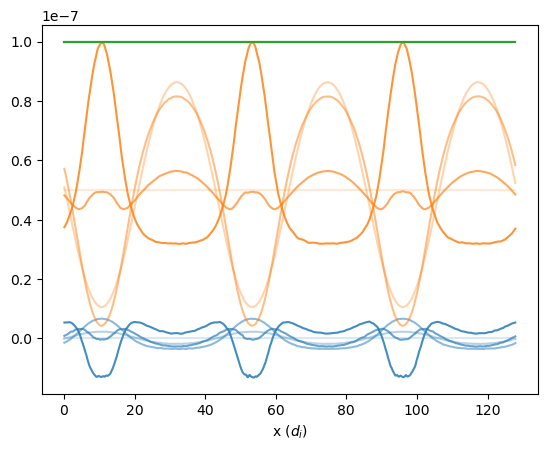

In [35]:
i = 0
j = 5
plot_ts(ts, i, j)

yt : [INFO     ] 2024-03-14 13:42:26,787 Parameters: current_time              = 0.1786193376439047


yt : [INFO     ] 2024-03-14 13:42:26,788 Parameters: domain_dimensions         = [512   1   1]
yt : [INFO     ] 2024-03-14 13:42:26,789 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-03-14 13:42:26,790 Parameters: domain_right_edge         = [6.80203937e+05 1.00000000e+00 1.00000000e+00]
yt : [INFO     ] 2024-03-14 13:42:26,876 Parameters: current_time              = 0.21434320517268501
yt : [INFO     ] 2024-03-14 13:42:26,877 Parameters: domain_dimensions         = [512   1   1]
yt : [INFO     ] 2024-03-14 13:42:26,877 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-03-14 13:42:26,878 Parameters: domain_right_edge         = [6.80203937e+05 1.00000000e+00 1.00000000e+00]
yt : [INFO     ] 2024-03-14 13:42:26,937 Parameters: current_time              = 0.25006707270146533
yt : [INFO     ] 2024-03-14 13:42:26,938 Parameters: domain_dimensions         = [512   1   1]
yt : [INFO     ] 2024-03-14 13:42:26,938 Parameters: domain_left_edge    

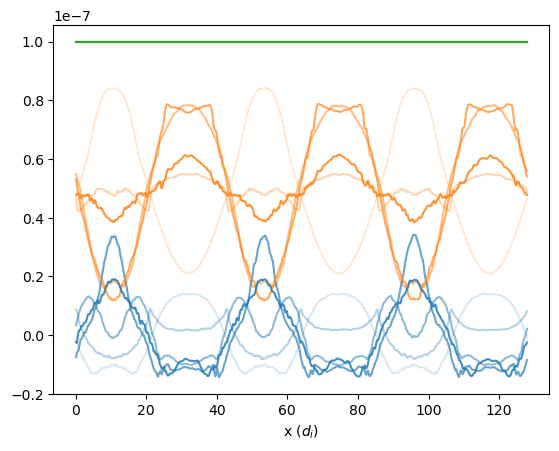

In [36]:
i = 5
j = 10
plot_ts(ts, i, j)

yt : [INFO     ] 2024-03-14 13:06:31,200 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-14 13:06:31,201 Parameters: domain_dimensions         = [512  16   1]
yt : [INFO     ] 2024-03-14 13:06:31,202 Parameters: domain_left_edge          = [-340101.96874125       0.               0.        ]
yt : [INFO     ] 2024-03-14 13:06:31,202 Parameters: domain_right_edge         = [3.40101969e+05 2.12563730e+04 1.00000000e+00]
yt : [INFO     ] 2024-03-14 13:06:31,281 Parameters: current_time              = 0.035723867528782094
yt : [INFO     ] 2024-03-14 13:06:31,283 Parameters: domain_dimensions         = [512  16   1]
yt : [INFO     ] 2024-03-14 13:06:31,284 Parameters: domain_left_edge          = [-340101.96874125       0.               0.        ]
yt : [INFO     ] 2024-03-14 13:06:31,288 Parameters: domain_right_edge         = [3.40101969e+05 2.12563730e+04 1.00000000e+00]
yt : [INFO     ] 2024-03-14 13:06:31,378 Parameters: current_time              = 0.0714477350575637

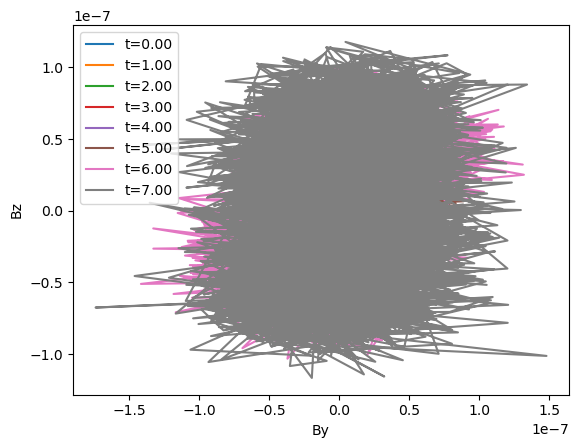

In [188]:
for ds in ts:
    hodogram(ds)
    plt.legend()

yt : [INFO     ] 2024-03-14 13:06:57,828 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-14 13:06:57,829 Parameters: domain_dimensions         = [512  16   1]
yt : [INFO     ] 2024-03-14 13:06:57,830 Parameters: domain_left_edge          = [-340101.96874125       0.               0.        ]
yt : [INFO     ] 2024-03-14 13:06:57,832 Parameters: domain_right_edge         = [3.40101969e+05 2.12563730e+04 1.00000000e+00]
yt : [INFO     ] 2024-03-14 13:06:57,904 Parameters: current_time              = 0.035723867528782094
yt : [INFO     ] 2024-03-14 13:06:57,905 Parameters: domain_dimensions         = [512  16   1]
yt : [INFO     ] 2024-03-14 13:06:57,906 Parameters: domain_left_edge          = [-340101.96874125       0.               0.        ]
yt : [INFO     ] 2024-03-14 13:06:57,906 Parameters: domain_right_edge         = [3.40101969e+05 2.12563730e+04 1.00000000e+00]
yt : [INFO     ] 2024-03-14 13:06:57,961 Parameters: current_time              = 0.0714477350575637

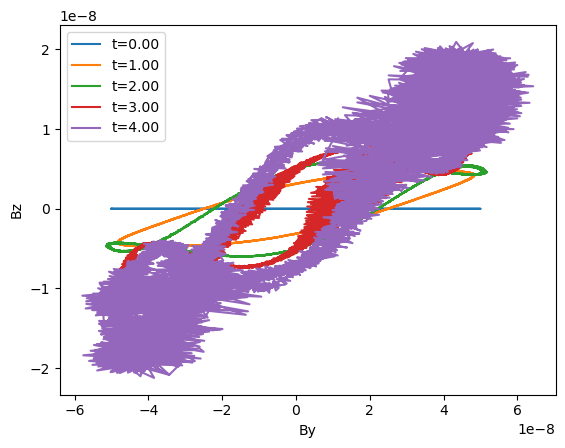

In [192]:
i = 5
for ds in ts[0:i]:
    hodogram(ds)
    plt.legend()

In [30]:
ds.fields

TypeError: 'FieldTypeContainer' object is not subscriptable

In [25]:
ds[("mesh", "Bx")]

KeyError: ('mesh', 'Bx')

yt : [INFO     ] 2024-03-13 17:10:23,638 xlim = -728644.160452 728644.160452
yt : [INFO     ] 2024-03-13 17:10:23,639 ylim = 0.000000 45540.260028
yt : [INFO     ] 2024-03-13 17:10:23,640 xlim = -728644.160452 728644.160452
yt : [INFO     ] 2024-03-13 17:10:23,641 ylim = 0.000000 45540.260028
yt : [INFO     ] 2024-03-13 17:10:23,643 Making a fixed resolution buffer of (('boxlib', 'Bz')) 800 by 800



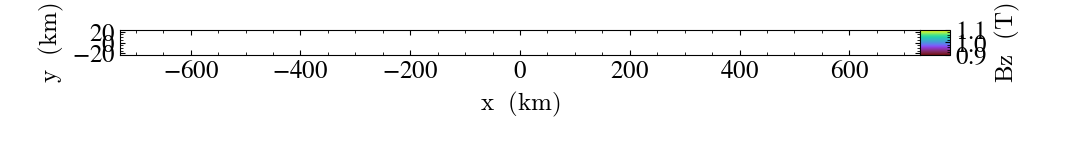

In [30]:
yt.SlicePlot(ds, "z", ("boxlib", "Bz"))

## Fields

In [143]:
ts = yt.load('./diags/diag1??????')
# ts = yt.load('./diags/diag???0032')

In [144]:
fields = [
    ("boxlib", "Bx"),
    ("boxlib", "By"),
    ("boxlib", "Bz"),
    ("boxlib", "Ex"),
    ("boxlib", "Ey"),
    ("boxlib", "Ez"),
    ("mesh", "magnetic_field_strength"),
]
    
for ds in ts.piter():
    slc = yt.SlicePlot(
        ds,
        "z",
        fields,
        origin="native",
    )  # Create a sliceplot object
    slc.set_axes_unit("km")
    slc.save("figures/")

yt : [INFO     ] 2024-03-14 12:48:41,015 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-14 12:48:41,016 Parameters: domain_dimensions         = [512  16   1]
yt : [INFO     ] 2024-03-14 12:48:41,017 Parameters: domain_left_edge          = [-340101.96874125       0.               0.        ]
yt : [INFO     ] 2024-03-14 12:48:41,018 Parameters: domain_right_edge         = [3.40101969e+05 2.12563730e+04 1.00000000e+00]
yt : [INFO     ] 2024-03-14 12:48:41,175 xlim = -340101.968741 340101.968741
yt : [INFO     ] 2024-03-14 12:48:41,175 ylim = 0.000000 21256.373046
yt : [INFO     ] 2024-03-14 12:48:41,176 xlim = -340101.968741 340101.968741
yt : [INFO     ] 2024-03-14 12:48:41,176 ylim = 0.000000 21256.373046
yt : [INFO     ] 2024-03-14 12:48:41,177 Making a fixed resolution buffer of (('boxlib', 'Ey')) 800 by 800
yt : [INFO     ] 2024-03-14 12:48:41,202 Making a fixed resolution buffer of (('boxlib', 'Ex')) 800 by 800
yt : [INFO     ] 2024-03-14 12:48:41,225 Making a 

## Particles

In [125]:
ts = yt.load('./diags/diag2??????')

In [135]:
from rich import print

In [136]:
def info(ts):
    ds = ts[0]
    print(ds.current_time)
    print(ds.field_list)

info(ts)

yt : [INFO     ] 2024-03-14 12:43:32,695 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-14 12:43:32,700 Parameters: domain_dimensions         = [512  16   1]
yt : [INFO     ] 2024-03-14 12:43:32,705 Parameters: domain_left_edge          = [-340101.96874125       0.               0.        ]
yt : [INFO     ] 2024-03-14 12:43:32,709 Parameters: domain_right_edge         = [3.40101969e+05 2.12563730e+04 1.00000000e+00]


0.0 code_time

[
    ('all', 'particle_cpu'),
    ('all', 'particle_id'),
    ('all', 'particle_momentum_x'),
    ('all', 'particle_momentum_y'),
    ('all', 'particle_momentum_z'),
    ('all', 'particle_position_x'),
    ('all', 'particle_position_y'),
    ('all', 'particle_weight'),
    ('ions', 'particle_cpu'),
    ('ions', 'particle_id'),
    ('ions', 'particle_momentum_x'),
    ('ions', 'particle_momentum_y'),
    ('ions', 'particle_momentum_z'),
    ('ions', 'particle_position_x'),
    ('ions', 'particle_position_y'),
    ('ions', 'particle_weight'),
    ('nbody', 'particle_cpu'),
    ('nbody', 'particle_id'),
    ('nbody', 'particle_momentum_x'),
    ('nbody', 'particle_momentum_y'),
    ('nbody', 'particle_momentum_z'),
    ('nbody', 'particle_position_x'),
    ('nbody', 'particle_position_y'),
    ('nbody', 'particle_weight')
]

yt : [INFO     ] 2024-03-14 12:47:10,796 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-03-14 12:47:10,797 Parameters: domain_dimensions         = [512  16   1]
yt : [INFO     ] 2024-03-14 12:47:10,798 Parameters: domain_left_edge          = [-340101.96874125       0.               0.        ]
yt : [INFO     ] 2024-03-14 12:47:10,799 Parameters: domain_right_edge         = [3.40101969e+05 2.12563730e+04 1.00000000e+00]
yt : [INFO     ] 2024-03-14 12:47:10,853 xlim = -340101.968741 340101.968741
yt : [INFO     ] 2024-03-14 12:47:10,854 ylim = 0.000000 21256.373046
yt : [INFO     ] 2024-03-14 12:47:10,854 xlim = -340101.968741 340101.968741
yt : [INFO     ] 2024-03-14 12:47:10,855 ylim = 0.000000 21256.373046
yt : [INFO     ] 2024-03-14 12:47:10,856 Splatting (('ions', 'particle_weight')) onto a 800 by 800 mesh using method 'ngp'



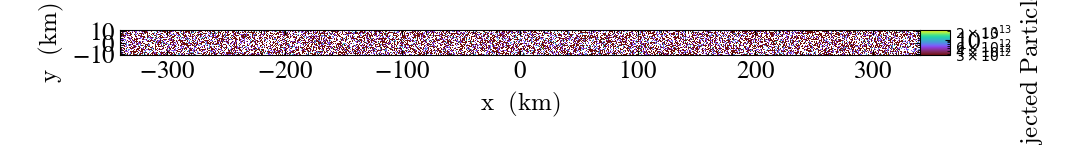

In [141]:
fields = [
    ("ions", 'particle_momentum_x'),
]
direction = "z"


ps = "ions"
ds = ts[0]
# slc = yt.SlicePlot(ds, direction, fields, origin="native")
p = yt.ParticlePlot(
    ds,
    (ps, "particle_position_x"),
    (ps, "particle_position_y"),
    (ps, "particle_weight"),
)
p

### OpenPMD

In [ ]:
import openpmd_api as io

# example: data handling
import numpy as np

In [ ]:
openpmd_backend = "h5"
series = io.Series(f"diags/diag1/openpmd_%06T.{openpmd_backend}", io.Access.read_only)


Error: Read Error in frontend 
Object type:	File
Error type:	Inaccessible
Further description:	Supplied directory is not valid: diags/diag1/

In [ ]:
print("openPMD version: ", series.openPMD)

openPMD version:  1.1.0


In [ ]:
list(series.iterations)
i = series.iterations[64]

In [ ]:
# record
B = i.meshes["B"]

SyntaxError: invalid syntax (401656362.py, line 3)

In [ ]:
# record
B = i.meshes["B"]

# record components
B_x = B["x"]
B_y = B["y"]
B_z = B["z"]

B_x_data = B_x.load_chunk()
B_y_data = B_y.load_chunk()
B_z_data = B_z.load_chunk()
series.flush()

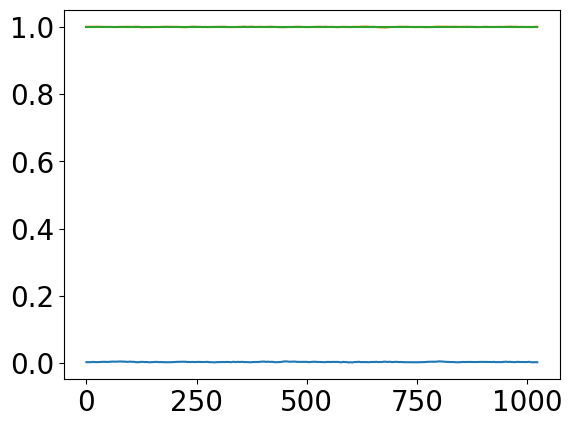

In [ ]:
plt.plot(B_x_data)
plt.plot(B_y_data)
plt.plot(B_z_data)